# Modeling

## Imports

In [227]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tools.eval_measures import rmse
from sklearn import feature_selection
from statsmodels.regression import linear_model

## Import Pickle File

In [228]:
infile = open('data/pickles/demolished_buildings.pickle', 'rb')
demolished_buildings = pickle.load(infile)
infile.close()

In [229]:
type(demolished_buildings)

pandas.core.frame.DataFrame

In [230]:
demolished_buildings.head(4)

,policeprct,healtharea,zonedist1,zonedist2,zonedist3,overlay1,spdist1,spdist2,ltdheight,splitzone,...,factryarea,bldgfront,ext,irrlotcode,lottype,assesstot,yearbuilt,histdist,landmark,lifespan
82,13.0,5900.0,C1-8A,0,0,0,0,0,0,N,...,0.0,0.0,0,N,5.0,478592.0,1972,0,0,46
106,108.0,1021.0,R5D,0,0,0,0,0,0,N,...,0.0,0.0,0,Y,6.0,64380.0,1972,0,0,30
134,81.0,3100.0,C4-4L,0,0,0,0,0,0,N,...,0.0,72.0,E,N,5.0,1757700.0,1922,0,0,69
185,66.0,5310.0,C8-2,0,0,0,OP,0,0,N,...,0.0,0.0,0,Y,5.0,19350.0,1972,0,0,25


## Continuous & Categorical Variables

In [231]:
all_cols = list(demolished_buildings.columns)
all_cols = sorted(all_cols)
all_cols

['assesstot',
 'bldgclass',
 'bldgfront',
 'ext',
 'factryarea',
 'healtharea',
 'histdist',
 'irrlotcode',
 'landmark',
 'lifespan',
 'lotarea',
 'lottype',
 'ltdheight',
 'overlay1',
 'ownertype',
 'policeprct',
 'spdist1',
 'spdist2',
 'splitzone',
 'strgearea',
 'yearbuilt',
 'zonedist1',
 'zonedist2',
 'zonedist3']

In [232]:
# making a list of continuous columns
cont_cols = ['lotarea', 'strgearea','factryarea', 'bldgfront', 'assesstot', 'yearbuilt']

# making a dataframe of continuous columns
cont_cols_df = demolished_buildings[['lotarea', 'strgearea','factryarea', 'bldgfront', 'assesstot', 'yearbuilt']]

#making a list of categorical columns
cat_cols = []

for col in all_cols:
    if col in cont_cols:
        pass
    if col == 'lifespan':
        pass
    else:
        cat_cols.append(col)
    
print(cat_cols)
print(len(cat_cols))

['assesstot', 'bldgclass', 'bldgfront', 'ext', 'factryarea', 'healtharea', 'histdist', 'irrlotcode', 'landmark', 'lotarea', 'lottype', 'ltdheight', 'overlay1', 'ownertype', 'policeprct', 'spdist1', 'spdist2', 'splitzone', 'strgearea', 'yearbuilt', 'zonedist1', 'zonedist2', 'zonedist3']
23


## Train Test Split

In [233]:
# try a model using only continous variables
X = cont_cols_df
y = demolished_buildings['lifespan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

## Model 1A : Linear Regression

Using Continuous Variables only.

### From Scratch

In [234]:
def linear_reg_model(Xtrain, ytrain, Xtest, ytest):
    """
    Function takes training and test data as input and returns the following:
    - Accuracy Score
    - Coefficients
    - P-values
    - Mean squared error
    - Root mean squared error
    - R-squared
    - Cross Validation Score    
    - Residuals plot
    - Predictions Dataframe
    """
    
    #instantiate model
    model = LinearRegression(fit_intercept=True, copy_X=True).fit(Xtrain, ytrain)
    #make predictions
    y_pred = model.predict(Xtest)
    #get coefficients
    coef = model.coef_
    #make list of columns
    column_list = list(Xtrain.columns)    
    # attach names to coefficients
    coefficients = dict(zip(column_list, coef))    
    #get performance metric
    MSE = mean_squared_error(ytest, y_pred)    
    #cross validation 5 folds
    cvs = cross_val_score(estimator=model, X=Xtest, y=ytest, cv=5)        
    #make dataframe of predictions
    pred = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
    
    #f-test to see which coefficients have p-values greater than 0.05
    f_test = feature_selection.f_regression(Xtrain, ytrain)
    pvalues = list(zip(list(Xtrain.columns), f_test[1]))
    
    large_pvalues = []
    for i in pvalues:
        if i[1] > 0.05:
            large_pvalues.append(i)
    
    print('Accuracy Score ', model.score(Xtest, ytest))    
    print('Coefficients ', coefficients)    
    print('P-Values Greater than 0.05', large_pvalues)    
    print('Mean Squared Error ', MSE)   
    print('Root Mean Squared Error ', np.sqrt(MSE))    
    print('R-Squared', r2_score(ytest, y_pred))       
    print('Cross Validation Score ', cvs)

    #plot residuals
    residuals = ytest - y_pred
    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(residuals, y_pred)
    
    return pred

Accuracy Score  0.9016724101573149
Coefficients  {'lotarea': -3.165186189328124e-06, 'strgearea': -1.4043477822092771e-05, 'factryarea': 4.649129550462128e-05, 'bldgfront': 0.01900167271613683, 'assesstot': 1.7666912452889011e-10, 'yearbuilt': -1.039311825265042}
P-Values Greater than 0.05 [('strgearea', 0.11552716074567967), ('assesstot', 0.3608876591422222)]
Mean Squared Error  83.50043288795412
Root Mean Squared Error  9.137857127792824
R-Squared 0.9016724101573149
Cross Validation Score  [0.89272863 0.88147014 0.90693815 0.90168005 0.90782767]


,Actual,Predicted
36977,94,84.123631
35941,109,101.333591
33183,25,35.376091
13343,30,34.964462
21854,37,38.368223
...,...,...
26298,42,34.974682
37081,54,42.925295
10646,25,34.973528
35889,88,78.526495


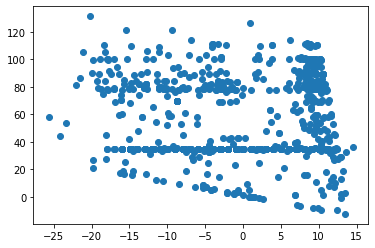

In [235]:
linear_reg_model(X_train, y_train, X_test, y_test)

__Comments__

Even though most of the data did not have a linear relationship to the target variable, the model performed well. 

The r-squared value is 0.90, which means that the model explains 90% of the variation in building lifespan.

The coefficients indicate tha factryarea and assesstot have the strongest influence on lifespan.

An RMSE of 9.1 means that the predictions are off by 9 years on average in either direction.

strgarea has a p-value of 1.155\
assesstot has a p-value of 0.360\
These are both greater than 0.05.

The residuals plot has some patterns in it, so the model can likely be improved.

__Next Steps:__

Do a double check using statsmodels to confirm the results.

## Model 1A : Linear Regression

### Using Mix of Continous & Categorical Variables

This model is a double check of the first model. 

### Using Statsmodels

In [236]:
Xcont_train = sm.add_constant(X_train)
Xcont_test = sm.add_constant(X_test)

model = sm.OLS(y_train, Xcont_train)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lifespan   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     3675.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:23:56   Log-Likelihood:                -8551.1
No. Observations:                2373   AIC:                         1.712e+04
Df Residuals:                    2366   BIC:                         1.716e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2084.5033     14.479    143.967      0.000    2056.110    2112.896
lotarea    -3.165e-06   1.19e-06     -2.650      0.008   -5.51e-06   -8.23e-07
strgearea  -1.404e-05    5.6e-06     -2.508      0.012    -2.5e-05   -3.06e-06
factryarea  4.649e-05   4.17e-05      1.115      0.265   -3.53e-05       0.000
bldgfront      0.0190      0.004      4.854      0.000       0.011       0.027
assesstot   1.767e-10   1.91e-08      0.009      0.993   -3.73e-08    3.76e-08
yearbuilt     -1.0393      0.007   -140.685      0.000      -1.054      -1.025
==============================================================================
Omnibus:                      982.092   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.554
Skew:                          -0.329   Prob(JB):                     5.03e-36
Kurtosis:                       1.899   Cond. No.                     8.04e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Comments__

This model is a double check confirming the results of the first model.

P-value for factryarea, strgearea and assesstot are > 0.05, so these coefficients are irrelevant for predicting the target and should be dropped. However, this will result in less than 5 variables, so some of the categorical variables will need to be added.

factryarea coefficient has a value of 4.649e-05 or 464,900. This is outside of the 95% confidence interval.

assesstot coefficient has a value of 1.767e-10 or 17,670,000,000. This is outside of the 95% confidence interval.

In [237]:
y_predict = fitted_model.predict(Xcont_test)

In [238]:
ci = fitted_model.conf_int(alpha=0.05)
ci

,0,1
const,2.056110e+03,2.112896e+03
lotarea,-5.507474e-06,-8.228984e-07
strgearea,-2.502368e-05,-3.063279e-06
factryarea,-3.526563e-05,1.282482e-04
bldgfront,1.132564e-02,2.667771e-02
assesstot,-3.726632e-08,3.761966e-08
yearbuilt,-1.053799e+00,-1.024825e+00


In [239]:
ci[0]['lotarea']

-5.507473956161507e-06

In [240]:
ci[1]['lotarea']

-8.22898422633378e-07

In [241]:
lot_area_interval = ci[0]['lotarea'] - ci[1]['lotarea']
lot_area_interval

-4.684575533528129e-06

## Model 2 : Linear Regression

### Using Mix of Continous & Categorical Variables

In [242]:
infile = open('data/pickles/demo_cat.pickle', 'rb')
demo_cat = pickle.load(infile)
infile.close()

In [243]:
demo_cat.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [244]:
cont_cols_df.head(3)

,lotarea,strgearea,factryarea,bldgfront,assesstot,yearbuilt
82,1840.0,0.0,0.0,0.0,478592.0,1972
106,7767.0,0.0,0.0,0.0,64380.0,1972
134,8000.0,0.0,0.0,72.0,1757700.0,1922


In [245]:
len(cont_cols_df)

3543

In [246]:
len(demo_cat)

3543

In [247]:
cont_cols_df = cont_cols_df.reset_index()

In [248]:
df2 = cont_cols_df.merge(demo_cat, how='outer', left_index=True, right_index=True)
df2.head(3)

,index,lotarea,strgearea,factryarea,bldgfront,assesstot,yearbuilt,0,1,2,...,10,11,12,13,14,15,16,17,18,19
0,82,1840.0,0.0,0.0,0.0,478592.0,1972,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,106,7767.0,0.0,0.0,0.0,64380.0,1972,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,134,8000.0,0.0,0.0,72.0,1757700.0,1922,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [249]:
# now remove columns that had questionable p-values
df2 = df2.drop(axis=1, columns=['factryarea', 'strgearea', 'assesstot'])

In [250]:
#checking number of columns
# before one-hot encoding the columns were 'irrlotcode', 'overlay1', 'splitzone', 'ownertype', 'ext'

len(df2.columns)

24

In [251]:
# making a model using continous & some categorical variables
X2 = df2
y2 = demolished_buildings['lifespan']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=12)

Accuracy Score  0.9241797548876822
Coefficients  {'index': 0.0002899849857458769, 'lotarea': 1.0962005111218138e-06, 'bldgfront': 0.015443088853120814, 'yearbuilt': -1.0199042825636502, 0: 0.8115953955017192, 1: 2.168924652209751, 2: 0.067237252460712, 3: 1.1263289537269254, 4: -0.610157438267647, 5: 2.6166579718042215, 6: -4.786188702421436, 7: -3.7957110364419586, 8: -3.491915721897984, 9: 1.7833027032601287, 10: -1.2752679231840456, 11: -6.241680500584169, 12: -5.282062444200504, 13: -2.4661354609314947, 14: -4.256106074061737, 15: -13.67111229368357, 16: 0.1893464280529193, 17: 1.2286553693594837, 18: -5.127564117354963, 19: -2.280779870132502}
P-Values Greater than 0.05 [(0, 0.055949995001861715), (1, 0.49523852943170665), (2, 0.10735711510093252), (3, 0.45383879727504306), (4, 0.6276564854778712), (5, 0.3611001260957446), (6, 0.06863229521798112), (8, 0.05225209380313934), (12, 0.07185100135705064), (13, 0.7115786454923033), (15, 0.2470695313420242)]
Mean Squared Error  64.387048

,Actual,Predicted
36977,94,84.640673
35941,109,104.863987
33183,25,31.899380
13343,30,32.498119
21854,37,39.388207
...,...,...
26298,42,36.251321
37081,54,48.077464
10646,25,31.712878
35889,88,82.852960


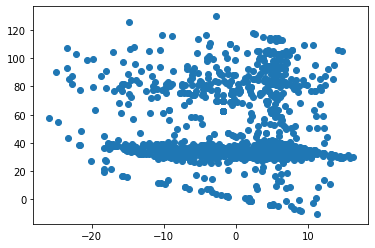

In [252]:
linear_reg_model(X_train2, y_train2, X_test2, y_test2)

__Comments__

Model performance improved slightly with RMSE down to 8.0 and accuracy up to 92%. 

Most p-values are very small, negative numbers which means they are statistically significant. 

Because the model improved after taking out 'factryarea', 'strgearea', 'assesstot', we can conclude that these features did not have a significant impact on the model.

Cross Validation confirms that the accuracy score of 0.92 is in the range of replicable scores.

The residuals plot shows a pattern, so there is more information that can be gleaned from the data. The pattern can be addressed by one of the following:
1. Independent variables may be missing, more variables can be included
2. The model may perform better with a polynomial term.
3. The model may perform better with an interaction term.

Next iteration: include more categorical variables.

## Model 3A: Linear Regression (Best Model)

### Using Mix of Continous & Categorical Variables

In [253]:
infile = open('data/pickles/demo_cat2.pickle', 'rb')
demo_cat2 = pickle.load(infile)
infile.close()

In [254]:
len(cont_cols_df)

3543

In [255]:
len(demo_cat2)

3543

In [256]:
cont_cols_df = cont_cols_df.reset_index()

In [257]:
df3 = cont_cols_df.merge(demo_cat2, how='outer', left_index=True, right_index=True)
df3.head(3)

,level_0,index,lotarea,strgearea,factryarea,bldgfront,assesstot,yearbuilt,0,1,...,42,43,44,45,46,47,48,49,50,51
0,0,82,1840.0,0.0,0.0,0.0,478592.0,1972,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,106,7767.0,0.0,0.0,0.0,64380.0,1972,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,134,8000.0,0.0,0.0,72.0,1757700.0,1922,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [258]:
# now remove columns that had questionable p-values
df3 = df3.drop(axis=1, columns=['factryarea', 'strgearea', 'assesstot'])

In [259]:
#checking number of columns
len(df3.columns)

57

In [260]:
# making a model using continous & some categorical variables
X3 = df3
y3 = demolished_buildings['lifespan']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=12)

Accuracy Score  0.9429043189570672
Coefficients  {'level_0': 0.021938934129831705, 'index': -0.0015563042564456127, 'lotarea': -2.3115872165935594e-07, 'bldgfront': 0.01477934288813021, 'yearbuilt': -0.9972418860397917, 0: 0.8739190332257893, 1: 2.929671314498023, 2: 1.7711314737470127, 3: 3.024851355943456, 4: 1.6388840319667302, 5: 3.88950215164186, 6: -1.6407273040579833, 7: -1.9026249448146586, 8: 0.9284004743524263, 9: 0.47615546060584124, 10: 0.22609167774765593, 11: -2.1094122473741312, 12: -1.9205560619332556, 13: -0.7695308936892115, 14: -4.215509771937163, 15: -10.7919277517103, 16: 0.5318051608833474, 17: 0.540463494748785, 18: -1.2086384712554312, 19: -0.8334463420172895, 20: -7.927724339030746, 21: -8.743278294006565, 22: 1.7763568394002505e-15, 23: 2.5819255407879877, 24: -4.247464133991277, 25: -5.49740514670352, 26: -4.843720231151975, 27: -1.5568887494691859, 28: -1.8917456525808458, 29: -3.7817288623017826, 30: -4.020261867905617, 31: -2.631489980912823, 32: 4.2446672

/opt/anaconda3/envs/capstone_env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,Actual,Predicted
36977,94,91.885731
35941,109,103.365252
33183,25,32.531279
13343,30,34.029748
21854,37,35.255557
...,...,...
26298,42,33.871031
37081,54,55.142326
10646,25,28.599410
35889,88,77.513050


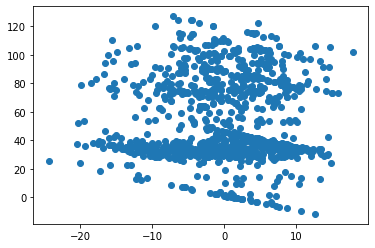

In [261]:
linear_reg_model(X_train3, y_train3, X_test3, y_test3)

__Comments__

This model performed very well at 94% accuracy with a RMSE of 6.9. 

This means that the predictions are within 7 years of the actual value in either direction. This is useful.

The residuals plot still shows a pattern. All possible features have been included, so the next potential steps include interactions and polynomial regression.

## Model 3B: Linear Regression (including questionable features)

### In this model, keeping columns 'factryarea', 'strgearea', 'assesstot'

In [262]:
infile = open('data/pickles/demo_cat2.pickle', 'rb')
demo_cat2 = pickle.load(infile)
infile.close()

In [263]:
len(cont_cols_df)

3543

In [264]:
len(demo_cat2)

3543

In [265]:
df4 = cont_cols_df.merge(demo_cat2, how='outer', left_index=True, right_index=True)
df4.head(3)

,level_0,index,lotarea,strgearea,factryarea,bldgfront,assesstot,yearbuilt,0,1,...,42,43,44,45,46,47,48,49,50,51
0,0,82,1840.0,0.0,0.0,0.0,478592.0,1972,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,106,7767.0,0.0,0.0,0.0,64380.0,1972,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,134,8000.0,0.0,0.0,72.0,1757700.0,1922,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [266]:
#checking number of columns
len(df4.columns)

60

In [267]:
# making a model using continous & some categorical variables
X4 = df4
y4 = demolished_buildings['lifespan']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.33, random_state=12)

Accuracy Score  0.9430154387275055
Coefficients  {'level_0': 0.021805857305733783, 'index': -0.0015447009848966618, 'lotarea': 2.4990008743223067e-08, 'strgearea': -9.21812601334057e-06, 'factryarea': -2.4818771725201028e-05, 'bldgfront': 0.01766270689883198, 'assesstot': -2.684382446882516e-08, 'yearbuilt': -0.9970215421498361, 0: 0.8678331678046987, 1: 2.9387457436126434, 2: 1.7947819974475725, 3: 3.011033221151226, 4: 1.6533483274366536, 5: 3.8594643124432833, 6: -1.6839620663658694, 7: -1.8683992972283938, 8: 0.9319129318672404, 9: 0.4849732436637907, 10: 0.20093373109593105, 11: -2.111978043641298, 12: -1.950355450504079, 13: -0.6243681200899361, 14: -4.243735173566778, 15: -10.877901748705742, 16: 0.4749940531579895, 17: 0.45151152209624135, 18: -1.2861844126248412, 19: -0.9302499699044777, 20: -8.021321382923475, 21: -8.672130224485251, 22: -1.865174681370263e-14, 23: 2.7897718309153645, 24: -4.2766791835302955, 25: -5.528881510484464, 26: -4.703924029049647, 27: -1.529077592353

/opt/anaconda3/envs/capstone_env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,Actual,Predicted
36977,94,91.820145
35941,109,103.394809
33183,25,32.821729
13343,30,34.052913
21854,37,35.263679
...,...,...
26298,42,33.872876
37081,54,55.143007
10646,25,28.543318
35889,88,77.563356


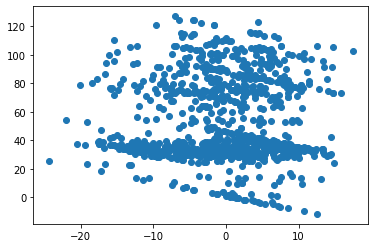

In [268]:
linear_reg_model(X_train4, y_train4, X_test4, y_test4)

__Comments__

This model performed the same as the prior model, indicating that features 'factryarea', 'strgearea', 'assesstot' have no meaningful impact on the model. 

## Model 3C: Linear Regression (Limited Features) - BEST MODEL

### Using all features with a P-value below 0.05

In [269]:
infile = open('data/pickles/demo_cat2.pickle', 'rb')
demo_cat2 = pickle.load(infile)
infile.close()

# make dataframe merging the categorical and continuous columns
df3C = cont_cols_df.merge(demo_cat2, how='outer', left_index=True, right_index=True)

# removing columns that had questionable p-values
df3C = df3C.drop(axis=1, columns=['factryarea', 'strgearea', 'assesstot', 2, 3, 5, 7, 8, 11, 
                                  12, 14, 15, 18, 19, 20, 21, 22, 23, 25, 32, 34, 35, 39, 42, 
                                  44, 49, 50, 51, 52])

# making a model using continous & some categorical variables
X3C = df3C
y3C = demolished_buildings['lifespan']

# train test split
X_train3C, X_test3C, y_train3C, y_test3C = train_test_split(X3C, y3C, test_size=0.33, random_state=12)

# instantiating the model
linear_reg_model(X_train3C, y_train3C, X_test3C, y_test3C)

KeyError: '[52] not found in axis'

__Comments__

This model performed very well with an accuracy of .96 and RMSE of 6.8.

## Model 4: Linear Regression with Interactions

### Add Interactions

In [ ]:
y_train3.shape

In [ ]:
y_train3 = y_train3.to_numpy()
y_train3 = y_train3.reshape(-1,1)

In [ ]:
y_train3.shape

In [ ]:
X_test3.shape

In [ ]:
ints = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

X_train3_int = ints.fit_transform(X_train3)
X_test3_int = ints.fit_transform(X_test3)

interaction_df = pd.DataFrame(X_train3_int)

interaction_model = linear_model.OLS(y_train3, interaction_df).fit()
interaction_model.pvalues[interaction_model.pvalues < 0.05]

In [ ]:
X_test3_int.shape

In [ ]:
X_train3_int.shape

In [ ]:
y_pred3 = interaction_model.predict(X_test3_int)
MSE3 = mean_squared_error(y_test3, y_pred3)

print('Root Mean Squared Error ', np.sqrt(MSE3))

__Comments__

The interaction terms are causing the model to become inaccurate, with a RMSE of 276. An RMSE this high when the building lifespan is typically 50+ years means that the model is unusable. 

Most likely, there are too many interactions because of high dimensionality. There were 58 features before interactions, and 1711 features after interactions. This illustrates the curse of dimensionality.

## Model 5: Polynomial Regression

In [ ]:
# Polynomial Regression

pf = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)

y_train3 = pd.DataFrame(y_train3)

X_train3_poly = pf.fit_transform(X_train3)
X_train3_poly = pd.DataFrame(X_train3_poly, index = y_train3.index)

X_test3_poly = pf.fit_transform(X_test3)
X_test3_poly = pd.DataFrame(X_test3_poly)

X_train3_poly.head(3)

In [ ]:
linear_reg_model(X_train3_poly, y_train3,  X_test3_poly, y_test3)

__Comments__

There is a strong pattern in the residuals plot. All results indicate this model is performing very poorly.



# Conclusion


The best model was Model 3C.